In [1]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.table import Table
import sys
sys.path.append('../src')
from Constants import Constants
from star_disk import orbit,disk,disk_Q,star_disk

c=Constants()

%matplotlib inline

# set some global options
plt.rcParams['figure.figsize'] = (6,5)
plt.rcParams['legend.frameon'] = False
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['legend.borderpad'] = 0.2
plt.rcParams['legend.labelspacing'] = 0.2
plt.rcParams['legend.handletextpad'] = 0.5
plt.rcParams['font.family'] = 'stixgeneral'
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.size'] = 16

In [2]:
### TEST OF ORBIT CLASS
orb = orbit(1.e7*c.msun)

a = 0.1*c.pc        # 0<a<inf
e = 0.9             # 0<e<1
OMEGA = 3          # -pi<OMEGA<pi
omega = -3          # -pi<omega<pi
I = 0.5             # 0<I<pi
f_in,f_out = orb.f_node_crossings(omega)
print ("f_in, f_out=",f_in, f_out)  # -pi<f<pi

my_ele = (a,e,OMEGA,omega,I, f_in)
POS,VEL = orb.elements_to_POS_VEL(my_ele)
print ("h=",orb.h_vec(POS,VEL))
new_ele = orb.POS_VEL_to_elements(POS,VEL)
print ((POS[0]*VEL[0] + POS[1]*VEL[1] + POS[2]*VEL[2]))

print ("--------- INITIAL, FINAL ELEMENTS ---------------------")
print ("a=",my_ele[0], new_ele[0])
print ("e=",my_ele[1], new_ele[1])
print ("OMEGA=",my_ele[2], new_ele[2])
print ("omega=",my_ele[3], new_ele[3])
print ("I=",my_ele[4], new_ele[4])
print ("f=",my_ele[5], new_ele[5])
print ("omega+f=",my_ele[3]+my_ele[5], new_ele[3]+new_ele[5])

f_in, f_out= -0.14159265358979312 3.0
h= [5.96859792e+23 4.18712218e+24 7.74195336e+24]
-5.9252092192268495e+23
--------- INITIAL, FINAL ELEMENTS ---------------------
a= 3.085677581e+17 3.0856775810000416e+17
e= 0.9 0.9000000000000014
OMEGA= 3 3.0
omega= -3 -3.0
I= 0.5 0.4999999999999999
f= -0.14159265358979312 -0.14159265358979303
omega+f= -3.141592653589793 -3.141592653589793


Mdot_Edd =  0.22182035411211506 (msun/yr) Mdot_disk = 0.22182035411211506 (msun/yr)
H/R =  0.011827511315732465


(-3.375252546202963e+18,
 3.393340920390617e+18,
 -3.3892673858997883e+18,
 3.3892673858997883e+18)

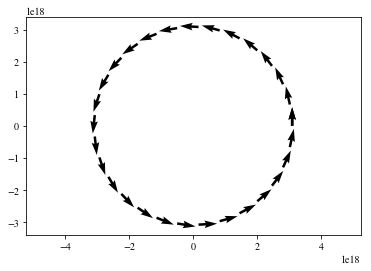

In [3]:
d = disk_Q(Mbh=1.e7*c.msun,
               ms=c.msun,
               rs=c.msun,
               lambda_disk=1,
               alpha_disk=1,
               Q_disk=1.0)


print ("H/R = ",d.h(0.1*c.pc) )

# CHECK THAT DISK VECTORS ARE CORRECT
ph = np.linspace(0,2*np.pi,30)
xx = c.pc * np.cos(ph)
yy = c.pc * np.sin(ph)
pos = np.array([xx,yy,np.zeros_like(xx)]).T
vel = []
for p in pos:
    vel.append(d.VDISK(p))
vel = np.array(vel)


plt.quiver(xx,yy,vel[:,0],vel[:,1])
plt.axis('equal')

In [4]:
s=star_disk(Mbh=1.e7*c.msun,
            ms=c.msun,
            rs=c.rsun,
            lambda_disk=1,
            alpha_disk =1,
            Q_disk=1,
            gamma=1.5)    

f = 30.
rt = (s.Mbh/s.ms)**(1./3.)*s.rs
a = 0.1*s.n.r_h     # 0<a<inf
e = 1.-f*rt/a         # 0<e<1
OMEGA = 0.25        # -pi<OMEGA<pi
omega = np.pi/2     # 0<omega<pi
I = np.pi/4         # 0<I<pi
my_ele = (a,e,OMEGA,omega,I)

print ("f=",f)
print ("e=",e)

my_ele = (a,e,OMEGA,omega,I)
c1_ele = s.disk_cross(my_ele,direction="in")
c2_ele = s.disk_cross(c1_ele,direction="out")

dE,E,dh,h = s.orb_delta_EJ(my_ele)

print ("--------- INITIAL, FINAL ELEMENTS ---------------------")
print ("a=",my_ele[0], c1_ele[0], c2_ele[0])
print ("e=",my_ele[1], c1_ele[1], c2_ele[1])
print ("rp/rt=",my_ele[0]*(1.-my_ele[1])/rt,c1_ele[0]*(1.-c1_ele[1])/rt,c1_ele[0]*(1.-c1_ele[1])/rt)

print ("------------------------------")
print ("E=",E)
print ("dE=",dE)
print ("dE/E=",dE/E)
print ("h=",h)
print ("dh=",dh)
print ("dh/h=",dh/h)

Mdot_Edd =  0.22182035411211506 (msun/yr) Mdot_disk = 0.22182035411211506 (msun/yr)
f= 30.0
e= 0.9997184643209045
--------- INITIAL, FINAL ELEMENTS ---------------------
a= 1.59668145621683e+18 1.216636043261553e+18 9.827316305923878e+17
e= 0.9997184643209045 0.9996305183840483 0.9995425745025048
rp/rt= 30.000000000003137 30.00012367877205 30.00012367877205
------------------------------
E= -415692997132087.5
dE= -259699225259193.25
dE/E= 0.6247380327570762
h= 1.0923725598960985e+24
dh= -4.353824904879643e+19
dh/h= -3.9856593480284406e-05
